# MATH 3094 Project 2 - Wheat Seeds Classification
The Wheat Seeds data set comes from the Institute of Agrophysics of the Polish Academy of Sciences in Lubin. It was originally used in a research paper on a gradient clustering algorithm.  
  
The dataset contains a collection of information about 210 wheat seeds. The data comes from images recorded on 13x18 cm X-ray KODAK plates. The attributes are:
  
  - Area  
  - Perimeter  
  - Compactness  
  - Kernel Length  
  - Kernal Width  
  - Asymmetry Coeff  
  - Kernel Groove  

The seeds are classified by type of seed. The types are specified as follows:
  1. Kama
  2. Rosa
  3. Canadian
  
The dataset can be found on Kaggle [here](https://www.kaggle.com/datasets/jmcaro/wheat-seedsuci?resource=download) and UC Irvine Machine Learning Repository [here](https://archive.ics.uci.edu/ml/datasets/seeds).

Here we start by importing the necessary modules and data, and dividing the data into train and test sets.


In [28]:
#imports
import numpy as np
import matplotlib as plt

from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.models import CategoricalColorMapper

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import normalize

output_notebook()

Loading BokehJS ...

In [15]:
data = np.genfromtxt("seeds.csv",delimiter=',',skip_header=1, usecols=[0, 1, 2, 3, 4, 5, 6])
attributes = np.genfromtxt("seeds.csv",delimiter=',',dtype=str, max_rows=1, usecols=[0, 1, 2, 3, 4, 5, 6])
labels = np.genfromtxt("seeds.csv", delimiter=',', dtype=int, usecols=7, skip_header=1)

data_train, data_test, labels_train, labels_test = train_test_split(data,labels,test_size=.2)


## Support Vector Machine
This section focuses on the use of a support vector machine for classification. This is first done performing multi-class classification on the dataset. This is begun with a little data preprocessing. SVM is not scale invariant, so its best to normalize the data to mean 0 and variance one. That is done below.

In [22]:
data_normalized = normalize(data_train, axis=0, norm='l1')

Now the data model can be created and fit using Sci Kit Learn's SVM model. Through experimenting, it was found that the linear kernel, the RBF kernel, and the polynomial kernel with various degrees all resulted the same score and confusion matrix. Since the accuracies were all very similar, if not the same, the linear kernel is used due to its performance advantage.

In [48]:
SVM_Model = SVC(kernel="linear").fit(data_train, labels_train)

Here the score of the model is calculated on the test set.

In [49]:
SVM_score = SVM_Model.score(data_test,labels_test)
SVM_score

0.975

And finally the confusion matrix is generated.

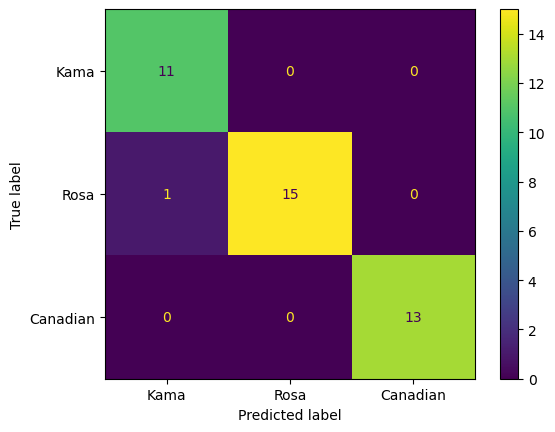

In [50]:
SVM_cm = confusion_matrix(labels_test, SVM_Model.predict(data_test))

#Graph the Confusion Matrix
SVM_cm_display = ConfusionMatrixDisplay(confusion_matrix=SVM_cm, display_labels=['Kama', 'Rosa', 'Canadian'])
SVM_cm_display.plot()

---
### Deeper look into the SVM Model
This is a seemingly very accurate model, but why? What aspects of the model describe the data well? This search is begun by plotting various features of the data and looking at the support vectors between them. 